In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Simenon-Georges']
list_titles_to_find=['Illusions-perdues','Splendeurs-et-miseres-des-courtisanesFC','Le-Pere-Goriot']
argsfig='figs/simenon_glob'

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling_mallet/results/doc-topics-glob.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[1] in list_authors_to_find:
        #if docname.split('_')[2][:len(docname.split('_')[2])-4] in list_titles_to_find:
            #docname=replace_all(docname, list_authors_to_replace)
            mallet_docnames.append(docname[5:-4])
            print(docname[5:-4])
            for topic, share in grouper(2, values):
                triple = (docname[5:-4], int(topic), float(share))
                doctopic_triples.append(triple)

Simenon-Georges_Le-Port-des-brumes
Simenon-Georges_La-colere-de-Maigret
Simenon-Georges_Le-revolver-de-Maigret
Simenon-Georges_Maigret-hesite
Simenon-Georges_Maigret-et-la-grande-perche
Simenon-Georges_Maigret-et-les-temoins-recalcitrants
Simenon-Georges_Les-dossiers-de-l-Agence-O
Simenon-Georges_Maigret-s-amuse
Simenon-Georges_L-Ecluse-n°1
Simenon-Georges_Maigret-et-l-inspecteur-Malgracieux
Simenon-Georges_Maigret-et-la-vieille-dame
Simenon-Georges_La-tete-d-un-homme
Simenon-Georges_Maigret-et-le-voleur-paresseux
Simenon-Georges_Un-crime-en-Hollande
Simenon-Georges_Le-Fou-de-Bergerac
Simenon-Georges_Maigret-et-l-homme-tout-seul
Simenon-Georges_L-Auberge-aux-noyes
Simenon-Georges_Au-Rendez-vous-des-Terre-Neuvas
Simenon-Georges_La-fenetre-ouverte
Simenon-Georges_Rue-Pigalle
Simenon-Georges_Maigret-et-le-corps-sans-tete
Simenon-Georges_L-Affaire-Saint-Fiacre
Simenon-Georges_Maigret-aux-assises
Simenon-Georges_Les-scrupules-de-Maigret
Simenon-Georges_Maigret-et-la-jeune-morte
Simenon-Geor

In [7]:
print(doctopic_triples)

[('Simenon-Georges_Le-Port-des-brumes', 1, 0.40629167171778396), ('Simenon-Georges_Le-Port-des-brumes', 3, 0.21996605649169595), ('Simenon-Georges_Le-Port-des-brumes', 12, 0.10273972602739725), ('Simenon-Georges_Le-Port-des-brumes', 19, 0.08819250818281003), ('Simenon-Georges_Le-Port-des-brumes', 0, 0.04345981331070433), ('Simenon-Georges_Le-Port-des-brumes', 8, 0.0383682870650988), ('Simenon-Georges_Le-Port-des-brumes', 2, 0.023457388774396896), ('Simenon-Georges_Le-Port-des-brumes', 16, 0.01897199660564917), ('Simenon-Georges_Le-Port-des-brumes', 4, 0.015335192144502364), ('Simenon-Georges_Le-Port-des-brumes', 18, 0.011092253606497758), ('Simenon-Georges_Le-Port-des-brumes', 5, 0.005515820099405989), ('Simenon-Georges_Le-Port-des-brumes', 6, 0.005273366468662868), ('Simenon-Georges_Le-Port-des-brumes', 9, 0.004424778761061947), ('Simenon-Georges_Le-Port-des-brumes', 11, 0.004061098314947266), ('Simenon-Georges_Le-Port-des-brumes', 10, 0.0028488301612316644), ('Simenon-Georges_Le-Port

In [8]:
mallet_docnames = sorted(mallet_docnames)

In [9]:
num_docs = len(mallet_docnames)

In [10]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [11]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

1960
20


In [12]:
doctopic = np.zeros((num_docs, num_topics))

In [13]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [14]:
novel_names = []

In [15]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

98


In [16]:
novel_names = np.asarray(novel_names)

In [17]:
doctopic

array([[  6.86063812e-03,   4.70738965e-01,   1.74408993e-02, ...,
          1.90114068e-03,   6.60439742e-02,   2.19044470e-02],
       [  6.63286004e-02,   5.72751859e-01,   6.43002028e-02, ...,
          1.01419878e-03,   7.50507099e-03,   3.92832995e-02],
       [  5.87375804e-02,   5.12857978e-01,   2.13325541e-02, ...,
          4.38340152e-03,   2.95149036e-02,   1.40561075e-01],
       ..., 
       [  1.55608117e-03,   5.71330761e-01,   4.98568405e-02, ...,
          3.79683804e-03,   1.68056766e-03,   4.48773808e-02],
       [  1.18110236e-02,   6.21506870e-01,   2.13833565e-02, ...,
          5.40373630e-04,   8.25999691e-03,   2.54747568e-03],
       [  7.14285714e-03,   3.43650794e-01,   7.14285714e-03, ...,
          2.77777778e-02,   1.50793651e-02,   2.93650794e-02]])

In [18]:
doctopic_orig = doctopic.copy()

In [19]:
num_groups = len(set(novel_names))
print(num_groups)

98


In [20]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [21]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [22]:
doctopic = doctopic_grouped

In [23]:
doctopic

array([[  6.86063812e-03,   4.70738965e-01,   1.74408993e-02, ...,
          1.90114068e-03,   6.60439742e-02,   2.19044470e-02],
       [  6.63286004e-02,   5.72751859e-01,   6.43002028e-02, ...,
          1.01419878e-03,   7.50507099e-03,   3.92832995e-02],
       [  5.87375804e-02,   5.12857978e-01,   2.13325541e-02, ...,
          4.38340152e-03,   2.95149036e-02,   1.40561075e-01],
       ..., 
       [  1.55608117e-03,   5.71330761e-01,   4.98568405e-02, ...,
          3.79683804e-03,   1.68056766e-03,   4.48773808e-02],
       [  1.18110236e-02,   6.21506870e-01,   2.13833565e-02, ...,
          5.40373630e-04,   8.25999691e-03,   2.54747568e-03],
       [  7.14285714e-03,   3.43650794e-01,   7.14285714e-03, ...,
          2.77777778e-02,   1.50793651e-02,   2.93650794e-02]])

In [24]:
N, K = doctopic.shape
print(K)

20


In [25]:
ind = np.arange(N)

In [26]:
width = 0.5

In [27]:
plt.rcParams["figure.figsize"] = [16,9]

In [28]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 98 artists>

In [29]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f10ceb5bba8>,
 <a list of 98 Text xticklabel objects>)

In [30]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

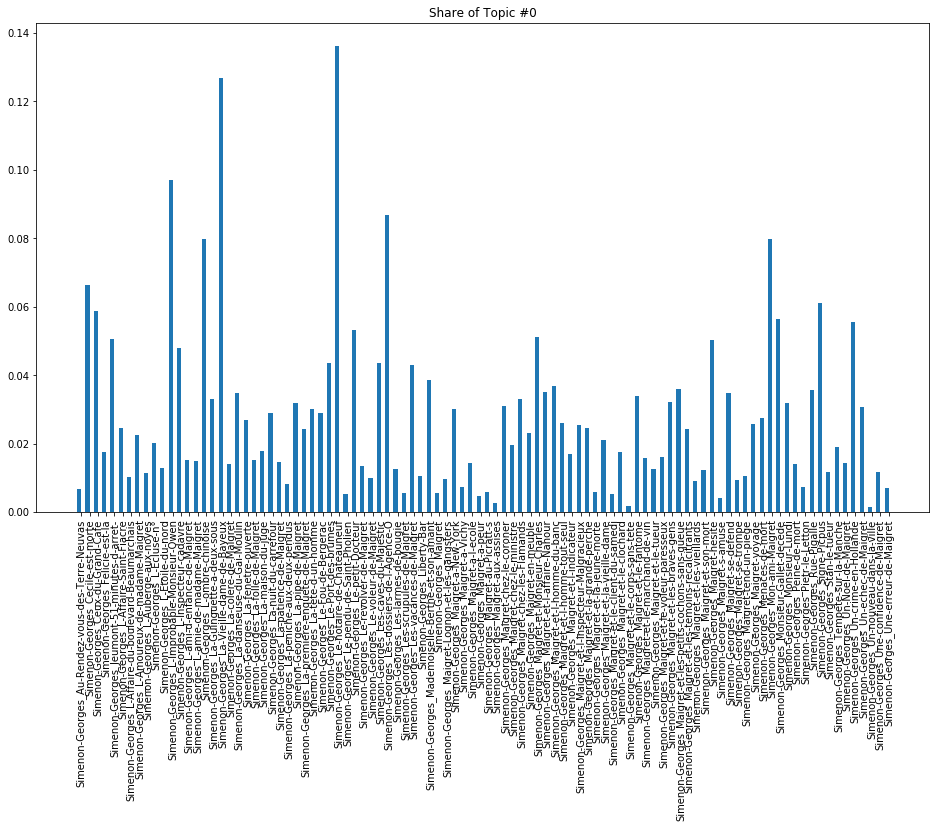

In [31]:
plt.show()

In [32]:
plots = []

In [33]:
height_cumulative = np.zeros(N)

In [34]:
fig=plt.figure()

In [35]:
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [36]:
plt.ylim((0, 1))

(0, 1)

In [37]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [38]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [39]:
list_topics =['crime/justice', 'noblesse/titre', 'animal', 'temps', 'marine', 'mort/finitude', 'argot/camaraderie', 'famille', 'armée', 'seigneurie','affaires courantes/mondanités','sentiment','nature','spiritualité','objet commun','modernité/technique','corps','?','plaisir/bonheur','?']

In [40]:
list_topics_glob =['monde domestique', 'temps', 'famille', 'marine', 'corps (entier)', 'réflexions sur l\'existence', 'police', 'famille (proche) ?', 'crime/affaire','armée', 'religion','sentiment','corps (visage)','mondanités','noblesse/titres','argot','nature','noblesse/lieux de noblesse','vie/mort','?']

In [41]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
Simenon-Georges_Au-Rendez-vous-des-Terre-Neuvas
numero 2
Simenon-Georges_Cecile-est-morte
numero 3
Simenon-Georges_Ceux-du-Grand-Cafe
numero 4
Simenon-Georges_Felicie-est-la
numero 5
Simenon-Georges_Jeumont-51-minutes-d-arret-
numero 6
Simenon-Georges_L-Affaire-Saint-Fiacre
numero 7
Simenon-Georges_L-Affaire-du-boulevard-Beaumarchais
numero 8
Simenon-Georges_L-Amoureux-de-madame-Maigret
numero 9
Simenon-Georges_L-Auberge-aux-noyes
numero 10
Simenon-Georges_L-Ecluse-n°
numero 11
Simenon-Georges_L-Etoile-du-nord
numero 12
Simenon-Georges_L-Improbable-Monsieur-Owen
numero 13
Simenon-Georges_L-Inspecteur-cadavre
numero 14
Simenon-Georges_L-ami-d-enfance-de-Maigret
numero 15
Simenon-Georges_L-amie-de-madame-Maigret
numero 16
Simenon-Georges_L-ombre-chinoise
numero 17
Simenon-Georges_La-Guinguette-a-deux-sous
numero 18
Simenon-Georges_La-Vieille-dame-de-Bayeux
numero 19
Simenon-Georges_La-colere-de-Maigret
numero 20
Simenon-Georges_La-danseuse-du-Gai-Moulin
numero 21
Simenon-Georges

In [42]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f10991070f0>],
 <a list of 1 Text yticklabel objects>)

In [43]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics_glob]

In [44]:
plt.legend([p[0] for p in plots], topic_labels,bbox_to_anchor=(1,1), loc="upper left")

In [45]:
fig.savefig(argsfig+'.png',bbox_inches='tight')
plt.close(fig)